# Klasyfikacja zbioru CIFAR-10


In [ ]:
from keras.datasets import cifar10

from keras import models
from keras import layers
from keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

**Przygotowanie danych**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
y_test = test_labels
print('Train dataset')
print(train_images.shape)
print(len(train_labels))
print(train_labels.shape)
print('Test dataset')
print(test_images.shape)
print(len(test_labels))
print(test_labels.shape)

Train dataset
(50000, 32, 32, 3)
50000
(50000, 1)
Test dataset
(10000, 32, 32, 3)
10000
(10000, 1)


*   Zbiór CIFAR-10 składa się z  60000 kolorowych obrazów o wymiarach 32×32 w 10 klasach
*   Zbiór treningowy składa się z 50000 obrazów
*   Zbiór testowy składa się z 10000 obrazów

In [ ]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

**Tworzenie sieci**

In [ ]:
network = models.Sequential()

network.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
network.add(layers.BatchNormalization())
network.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.MaxPooling2D(pool_size=(2,2)))
network.add(layers.Dropout(0.3))

network.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.MaxPooling2D(pool_size=(2,2)))
network.add(layers.Dropout(0.5))

network.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.MaxPooling2D(pool_size=(2,2)))
network.add(layers.Dropout(0.5))

network.add(layers.Flatten())
network.add(layers.Dense(128, activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.Dropout(0.5))
network.add(layers.Dense(10, activation='softmax'))

network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      



*   Sieć przetwarza obiekty wejściowe o rozmiarze (32, 32, 3)
*   Liczba kanałów - 32
*   Wysokość i szerkość zmniejszają się wraz z warstwami sieci
*   Flatten - spłaszczamy sieć do jednowymiarowgo tensora
*   Conv2D - tworzy sieć konwolucyjną
*   BatchNormalization - normalizuje wejścia, sieć działa szybciej
*   MaxPooling2D - zmniejsza cechy o połowę, zmniejsza rozdzielczość bo kolejne wartwy mają coraz to większe okna


In [ ]:
network.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

network.fit(train_images, train_labels, batch_size=64, epochs=15,
                    validation_data=(test_images, test_labels))
network.save('cifar10_model.h5')

Epoch 1/15
782/782 [==============================] - 504s 640ms/step - loss: 1.7135 - accuracy: 0.4121 - val_loss: 1.3479 - val_accuracy: 0.5220
Epoch 2/15
782/782 [==============================] - 517s 661ms/step - loss: 1.1662 - accuracy: 0.5838 - val_loss: 0.9403 - val_accuracy: 0.6675
Epoch 3/15
782/782 [==============================] - 509s 650ms/step - loss: 0.9741 - accuracy: 0.6599 - val_loss: 0.8580 - val_accuracy: 0.6995
Epoch 4/15
782/782 [==============================] - 504s 644ms/step - loss: 0.8740 - accuracy: 0.6948 - val_loss: 0.7766 - val_accuracy: 0.7271
Epoch 5/15
782/782 [==============================] - 504s 644ms/step - loss: 0.8062 - accuracy: 0.7201 - val_loss: 0.7467 - val_accuracy: 0.7427
Epoch 6/15
782/782 [==============================] - 505s 646ms/step - loss: 0.7499 - accuracy: 0.7409 - val_loss: 0.7774 - val_accuracy: 0.7317
Epoch 7/15
782/782 [==============================] - 475s 607ms/step - loss: 0.7074 - accuracy: 0.7552 - val_loss: 0.6882 -

**Sprawdzenie modelu**

In [ ]:
cifar10_model = models.load_model('cifar10model.h5')

test_loss, test_acc = cifar10_model.evaluate(test_images, test_labels)

print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

313/313 [==============================] - 23s 71ms/step - loss: 0.6316 - accuracy: 0.7959
Test Loss 0.6315553784370422
Test Accuracy 0.7958999872207642


313/313 [==============================] - 23s 74ms/step


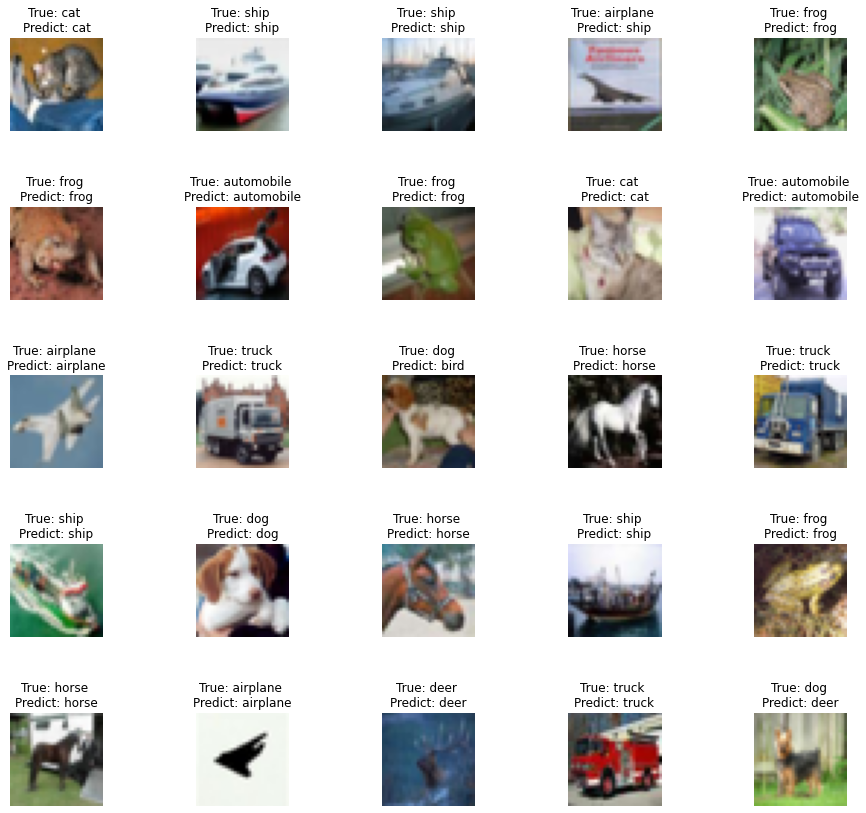

In [ ]:
pred = cifar10_model.predict(test_images)
pred_classes = np.argmax(pred, axis=1)


fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)